`ggplot2` is an R package for creating figures. It has many strengths over the base R graphics, such as ease of use. Before we get to the basics, here are two very useful references if you ever feel lost:

1. [Reference sheet of ggplot2 elements and commands](http://ggplot2.tidyverse.org/reference/)
2. [ggplot2 cheat sheet](https://www.rstudio.com/wp-content/uploads/2015/03/ggplot2-cheatsheet.pdf)

In the tutorial below we'll be using the `diamonds` dataset from the ggplot2 package. It contains "the prices and other attributes of almost 54,000 diamonds." You can get information about the variables by typing `?diamonds'` or at this [link](http://ggplot2.tidyverse.org/reference/diamonds.html)

### 1. Basics first

The two basic ideas behind `ggplot2` are that:
1. You add elements to a plot in layers
2. You create a mapping between plot elements, such as an x-axis, y-axis, color of elements, etc, and variables in your data.frame.

In `ggplot` the different layers are called *geoms* (a geometric object), and the mappings between elements and data is called *aes* (an aestethic object). 

Here's an example of a ggplot2 function, that we'll disect:

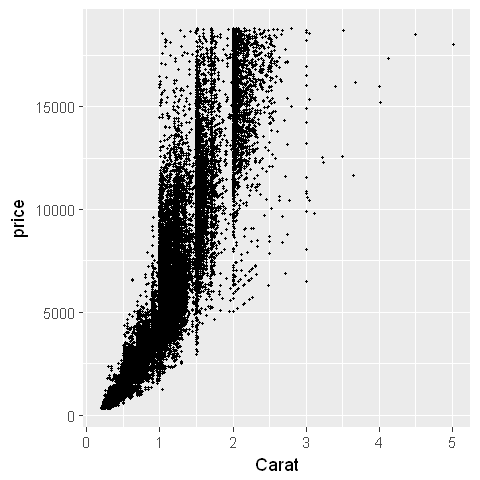

In [14]:
# set the size of the plot in jupyter
options(repr.plot.width=4, repr.plot.height=4)
library(ggplot2)

ggplot(diamonds, aes(x=carat, y=price)) +
    geom_point(size=0.5) +
    scale_x_continuous(name = 'Carat')

The above function contains almost all **ggplot components** in their simplest form. Namely:
* main statement **ggplot(...)** - initializes the plot
    * data object - the first elements is always the data.frame which contains the data for plotting
    * aestethics, **aes()** - function in which we specify what to plot on the x axis, y axis, color, fill, shape, linetype, etc
* geoms (e.g. **geom_point(...)**) - creates a new layer with the plot type in question
* changing formating (e.g. **scale_x_continuous(...)**) - in this case changes aspects of the x_axis

**_Note_**: as you may have noticed, different functions in ggplot are linked by a **`+`** sign. You can insert a new line after each plus sign, in order to help readibility. In ggplot, + signs between functions should be interpreted as "add layer" or "add formatting instructions", not as algebraic addition.

Here are the components labeled on the function:

![ggplot components](components_of_ggplot2.jpg)

### 2. Aesthetics

Aside from the x and y axises, you can assign to vary by group/variable the following aspects of the plot:

* color - color of the points/lines, etc
* fill - the fill color of bar graphs, box plots, histograms, etc
* shape - shape of points on a scatterplot
* size - size of points on a scatterplot
* linetype - solid, dashed, etc
* alpha - transparency of elements

Here are examples with each:

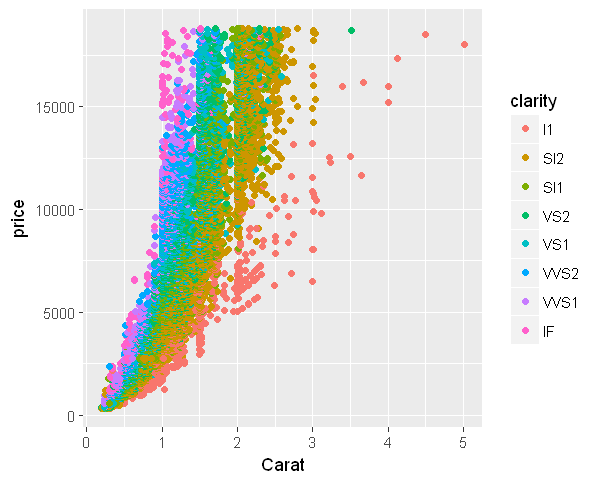

In [38]:
options(repr.plot.width=5, repr.plot.height=4)
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

Warning message:
"The shape palette can deal with a maximum of 6 discrete values because
more than 6 becomes difficult to discriminate; you have 7. Consider
specifying shapes manually if you must have them."Warning message:
"Removed 5 rows containing missing values (geom_point)."

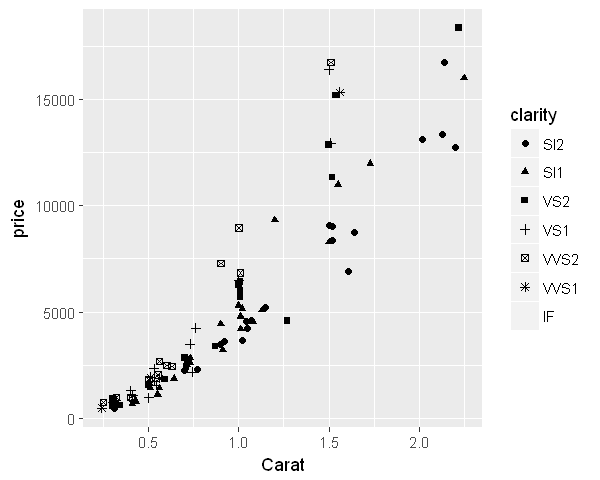

In [39]:
# get a smaller subset of data, to reduce overplotting
dsmall <- diamonds[sample(nrow(diamonds), 100), ]
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(dsmall, aes(x=carat, y=price, shape=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

Warning message:
"Using size for a discrete variable is not advised."

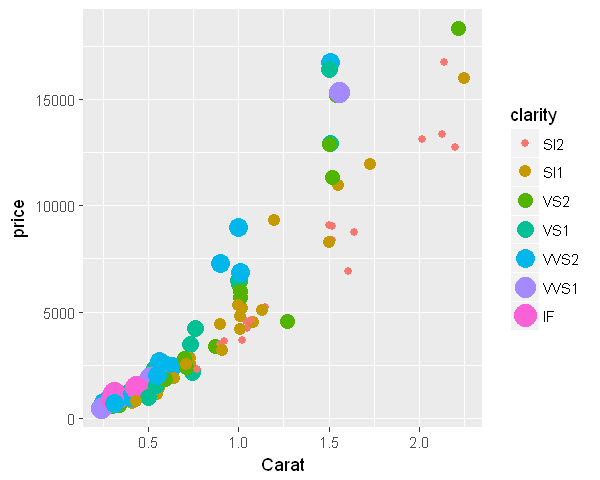

In [40]:
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(dsmall, aes(x=carat, y=price, size=clarity, color=clarity)) +
    geom_point() +
    scale_x_continuous(name = 'Carat')

### 3. Geoms

There are four broad types of geoms, depending on whether you are plotting raw data (e.g., every data point should be displayed), data distributions (e.g. density plots, histograms), summary data (e.g., only the mean of variable y for each level of x), and model_fits (e.g. fitting a regression line to the data). 

__Raw data is plotted with__:
* geom_point() - scatter plots
* geom_line() - line connecting datapoints
* geom_col() - bar chart
* geom_tile() - heatmap

__Distributions are plotted with (only specify an x variable - the y is calculated automatically by the distribution function)__ :
* geom_density() - density
* geom_histogram() - histograms
* geom_bar() - bar chart showing counts for each level of X (similar to histogram)

__Summary data are plotted with__:
* stat_summary(fun.data="summarising_function", geom="typeofplot"), where typeofplot is point, line, col, etc, and the summarising function tells ggplot how to transform the data. The default function is `mean_se` and it return the mean and the standard error for the y variable for each level of x.
* stat_summary_2d() - same as stat_summary, but in this case you are summarizing a third variable called z, over all combination of levels of x and y. It will create a heatmap of sorts
* geom_violin() - violin plot
* geom_boxplot() - boxplot

__Automatic model fits can be plotted with__:
* geom_smooth()

The type of plot you want, depends on your [purpose](https://github.com/ft-interactive/chart-doctor/blob/master/visual-vocabulary/Visual-vocabulary.pdf). 

### 3.1 Correlation

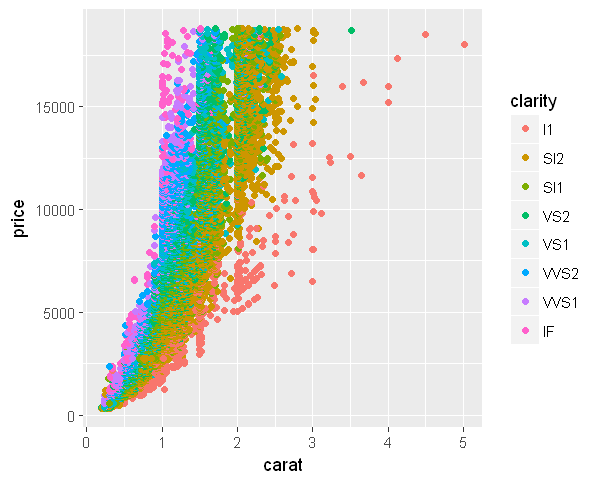

In [45]:
# Scatter plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    geom_point()

There are a lot of raw data points. We could, instead, calculate the mean price for each value of carat and plot the results. Rather than doing that beforehand, we can just uset the stat_summary function:

No summary function supplied, defaulting to `mean_se()


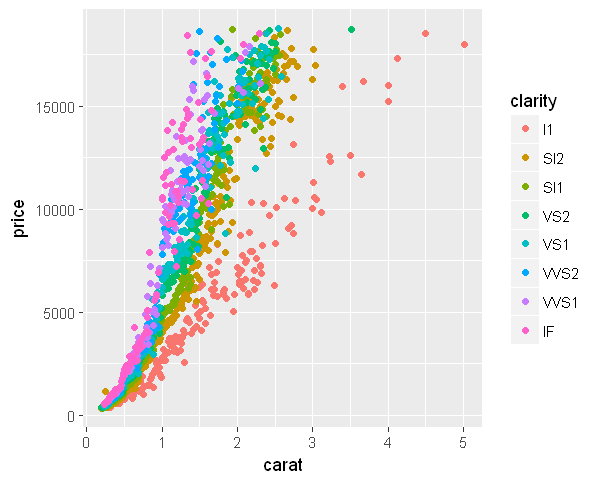

In [46]:
# # summarized plot of diamond price as a function of their carat and clarity
ggplot(diamonds, aes(x=carat, y=price, color=clarity)) +
    stat_summary(geom='point')

In the plot above, rather than showing individual datapoints, we see the average price for each recorded carat level. But since carat is a continuous variable, it would make more sense if we bin carat into groups, and then plot the mean price for those groups. One easy way is to just round carat to one significant digit, which would give us 10 bins for each carat unit, e.g., 0.1, 0.2,.... We can transform the x variable directly in the ggplot function:

No summary function supplied, defaulting to `mean_se()


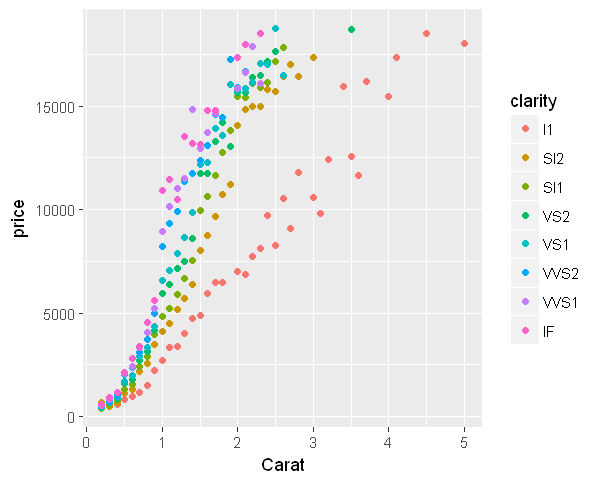

In [43]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point') 

This has made it much easier to see the general trend. It would help if we add a line connecting the dots:

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()


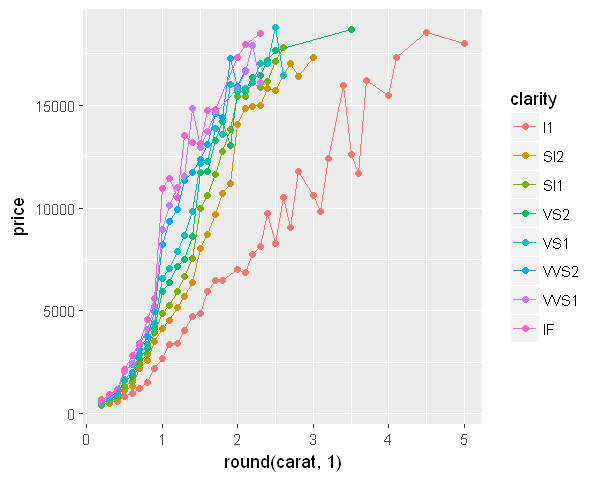

In [44]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='point') +
    stat_summary(geom='line')

One issue is that we have lost the variability in price. We can add error bars to each point:

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 18 rows containing missing values (geom_linerange)."

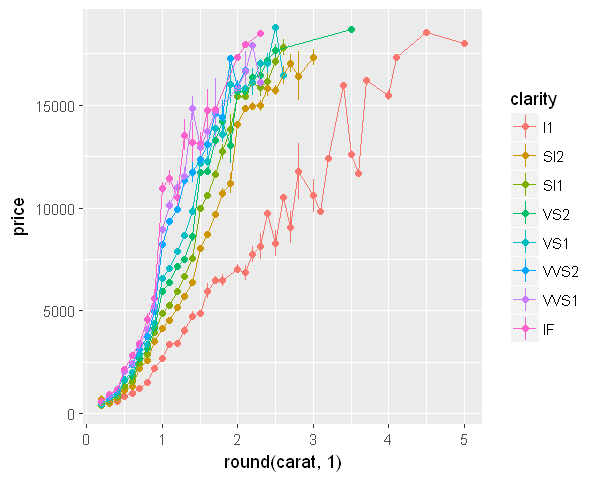

In [51]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=round(carat,1), y=price, color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point') +
    stat_summary(geom='line')

We see the error bars for many points, but not all. Why? Well for higher value of carat, there is a single datapoint! To help with that we can:

1. create even bigger bins
2. transform carat and price variables with a logarithm - logarithms squash bigger values more than smaller values and would thus bring bigger values closer to each other.


Indeed, if we check the distribution of carat and price, we will see that they have a long-tailed skew, and would benefit from a log transofmration. This will also illustrate how to create a histogram and a density plot:

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


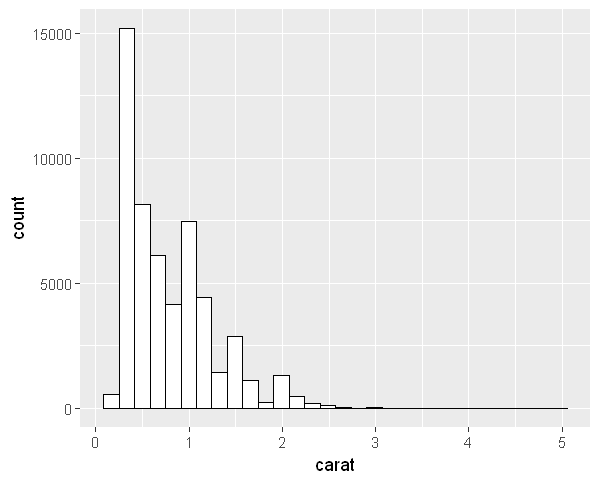

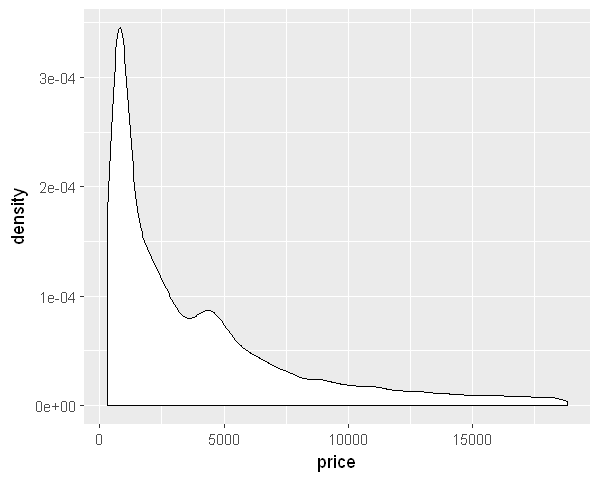

In [57]:
# # summarized plot of diamond price as a function of binned carat and clarity
ggplot(diamonds, aes(x=carat)) +
    geom_histogram(fill='white',color='black')

ggplot(diamonds, aes(x=price)) +
    geom_density(fill='white',color='black')

__*Note*__: when variables such as fill, or color are used outside of `aes`, they are not interpretted as mapping a data variable to color, but rather as assigning a specific value to all, in this case white filled histogram with black borders

Below is the transformed plot. Note that we are using the pipe in transforming carat, as explained in [the previous tutorial on tidyverse and pipes](https://github.com/CoAxLab/DataSciencePsychNeuro_CMU85732/blob/master/Tutorials/Processing%20data%20with%20the%20Split-Apply-Combine%20approach%20in%20R%20with%20the%20tidyr%20and%20dplyr%20packages.ipynb)

-- Attaching packages --------------------------------------- tidyverse 1.2.1 --
v tibble  1.3.4     v purrr   0.2.4
v tidyr   0.7.2     v dplyr   0.7.4
v readr   1.1.1     v stringr 1.2.0
v tibble  1.3.4     v forcats 0.2.0
-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 5 rows containing missing values (geom_linerange)."

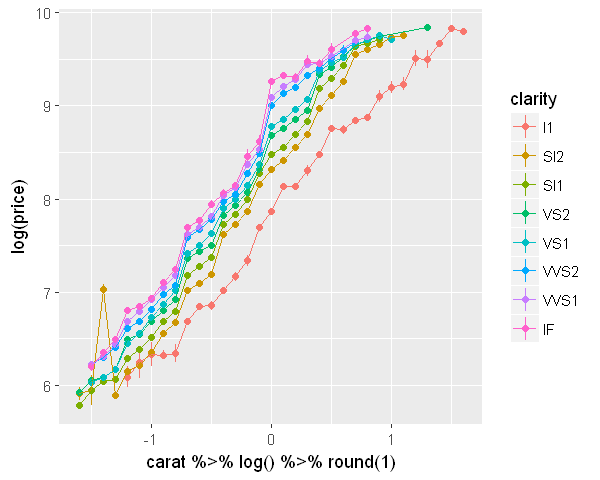

In [60]:
library(tidyverse)
ggplot(diamonds, aes(x=carat  %>% log()  %>% round(1), y=log(price), color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point') +
    stat_summary(geom='line')

One good thing about tidyverse and ggplot is that ggplot also takes a dataframe as the first argument! If you remember from the [tidyverse tutorial](https://github.com/CoAxLab/DataSciencePsychNeuro_CMU85732/blob/master/Tutorials/Processing%20data%20with%20the%20Split-Apply-Combine%20approach%20in%20R%20with%20the%20tidyr%20and%20dplyr%20packages.ipynb), you can chain tidyverse functions. In this case, to make the code clearer we could transform the variables with tidyverse and mutate and then pass the result to ggplot like this:

No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
No summary function supplied, defaulting to `mean_se()
Warning message:
"Removed 5 rows containing missing values (geom_linerange)."

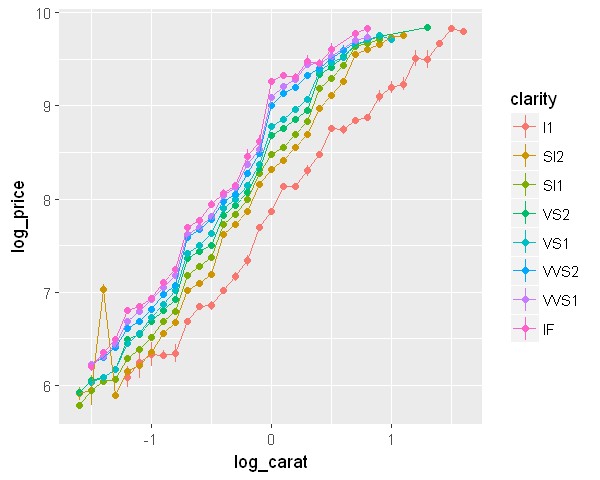

In [61]:
diamonds %>% 
    mutate(log_carat = carat  %>% log()  %>% round(1),
           log_price = log(price))  %>% 
    ggplot(aes(x=log_carat, y=log_price, color=clarity)) +
    stat_summary(geom='linerange') +
    stat_summary(geom='point') +
    stat_summary(geom='line')

### 3.2 Distribution

We already saw how to create histograms and density plots. What if we want to show the distribution separately for multiple groups? There are many ways we can do that. One option is boxplots:

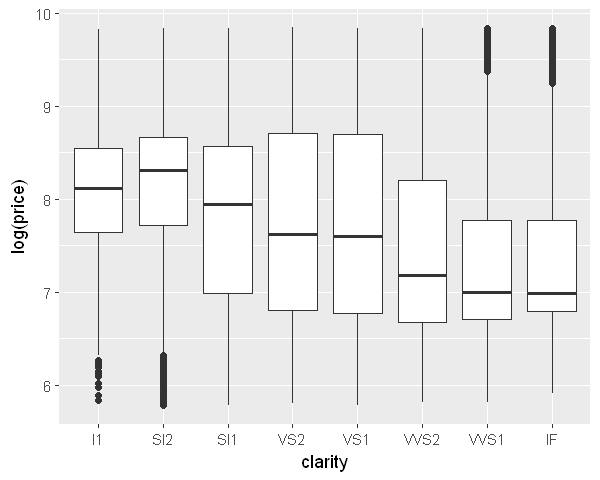

In [65]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_boxplot()

We could also do violin plots:

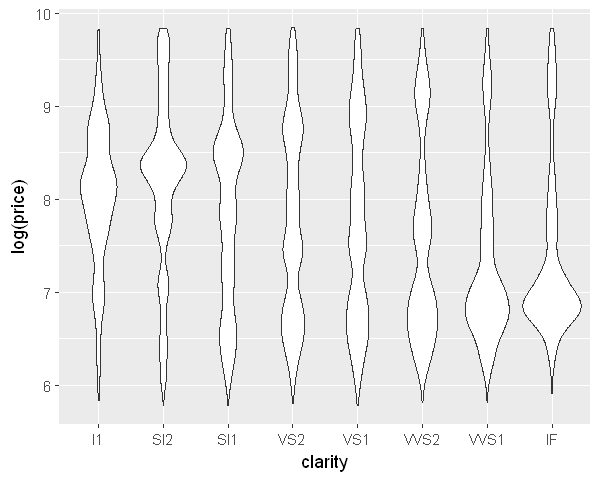

In [66]:
ggplot(diamonds, aes(x=clarity, y=log(price))) +
    geom_violin()